<a href="https://colab.research.google.com/github/mftnakrsu/case_study_baimageing/blob/main/current_add_new_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
! pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.8/898.8 kB 20.1 MB/s eta 0:00:00


In [4]:
from ultralytics import YOLO
import torch
import copy


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [10]:
import zipfile
import os

# Zip dosyasının adını belirtin
zip_file_name = '/content/model_dataset.zip'

# Zip dosyasını açma
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('model_dataset')  # Çıkarılan dosyaların kaydedileceği dizin

# Çıkarılan dosyaların içeriğini listeleme
extracted_files = os.listdir('model_dataset')
print("Çıkarılan dosyalar:")
for file in extracted_files:
    print(file)

Çıkarılan dosyalar:
additional_class
single_class_model.pt


In [11]:

# Initialize pretrained model
model = YOLO("/content/model_dataset/single_class_model.pt")

In [12]:
old_dict = copy.deepcopy(model.state_dict())


In [13]:
model.state_dict().keys()


odict_keys(['model.model.0.conv.weight', 'model.model.0.bn.weight', 'model.model.0.bn.bias', 'model.model.0.bn.running_mean', 'model.model.0.bn.running_var', 'model.model.0.bn.num_batches_tracked', 'model.model.1.conv.weight', 'model.model.1.bn.weight', 'model.model.1.bn.bias', 'model.model.1.bn.running_mean', 'model.model.1.bn.running_var', 'model.model.1.bn.num_batches_tracked', 'model.model.2.cv1.conv.weight', 'model.model.2.cv1.bn.weight', 'model.model.2.cv1.bn.bias', 'model.model.2.cv1.bn.running_mean', 'model.model.2.cv1.bn.running_var', 'model.model.2.cv1.bn.num_batches_tracked', 'model.model.2.cv2.conv.weight', 'model.model.2.cv2.bn.weight', 'model.model.2.cv2.bn.bias', 'model.model.2.cv2.bn.running_mean', 'model.model.2.cv2.bn.running_var', 'model.model.2.cv2.bn.num_batches_tracked', 'model.model.2.m.0.cv1.conv.weight', 'model.model.2.m.0.cv1.bn.weight', 'model.model.2.m.0.cv1.bn.bias', 'model.model.2.m.0.cv1.bn.running_mean', 'model.model.2.m.0.cv1.bn.running_var', 'model.mod

In [14]:
import os

# Etiket dosyalarının bulunduğu dizinler
label_dirs = [
    "/content/model_dataset/additional_class/labels/train",
    "/content/model_dataset/additional_class/labels/val"
]

# Etiket dosyalarını güncelleyen fonksiyon
def update_labels(directory):
    for filename in os.listdir(directory):
        if filename.endswith(".txt"):  # Sadece .txt dosyalarını işleme al
            filepath = os.path.join(directory, filename)

            # Dosyayı oku ve düzenle
            with open(filepath, "r") as file:
                lines = file.readlines()

            updated_lines = []
            for line in lines:
                parts = line.strip().split()
                if parts:  # Satır boş değilse işleme al
                    parts[0] = "1" if parts[0] == "0" else parts[0]
                    updated_lines.append(" ".join(parts))

            # Güncellenen içeriği tekrar dosyaya yaz
            with open(filepath, "w") as file:
                file.write("\n".join(updated_lines))

# Tüm dizinlerdeki etiket dosyalarını güncelle
for label_dir in label_dirs:
    update_labels(label_dir)

print("Etiket dosyaları başarıyla güncellendi.")


Etiket dosyaları başarıyla güncellendi.


In [15]:
results = model.train(data='/content/data.yaml', freeze=22, epochs=25, imgsz=640)


Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/model_dataset/single_class_model.pt, data=/content/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=22, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, s

train: Scanning /content/model_dataset/additional_class/labels/train.cache... 154 images, 20 backgrounds, 0 corrupt: 100%|██████████| 174/174 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/model_dataset/additional_class/labels/val.cache... 19 images, 1 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      4.24G      1.589      7.899     0.8729         59        640: 100%|██████████| 11/11 [00:06<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.52it/s]

                   all         20         59          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      4.23G      1.533      4.532     0.8806         57        640: 100%|██████████| 11/11 [00:05<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

                   all         20         59     0.0111      0.831     0.0435     0.0225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      4.28G      1.411      3.701      0.859         45        640: 100%|██████████| 11/11 [00:06<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.52it/s]

                   all         20         59       0.05      0.661     0.0715     0.0419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      4.02G      1.355      3.108     0.8653         79        640: 100%|██████████| 11/11 [00:05<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

                   all         20         59      0.562       0.22      0.359      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      3.94G      1.365      2.742     0.8575         87        640: 100%|██████████| 11/11 [00:06<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]

                   all         20         59      0.622      0.373      0.484      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      4.33G       1.39      2.625     0.8771         76        640: 100%|██████████| 11/11 [00:05<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.65it/s]

                   all         20         59      0.637      0.417      0.509      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      4.46G      1.403      2.548     0.8697         41        640: 100%|██████████| 11/11 [00:05<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all         20         59      0.638      0.458      0.545      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      4.33G      1.372      2.332     0.8591         40        640: 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.64it/s]

                   all         20         59      0.688      0.562      0.598       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      3.94G      1.349      2.172     0.8749         63        640: 100%|██████████| 11/11 [00:05<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

                   all         20         59      0.686      0.629      0.608      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      4.07G      1.338      2.269     0.8738         56        640: 100%|██████████| 11/11 [00:05<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.64it/s]

                   all         20         59      0.657      0.627      0.617      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      4.07G      1.358      2.146     0.8529         44        640: 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]

                   all         20         59      0.655      0.661       0.62      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      3.94G      1.264      1.918     0.8526         61        640: 100%|██████████| 11/11 [00:05<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.62it/s]

                   all         20         59      0.668      0.648       0.62      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      4.33G      1.271      1.991     0.8396         47        640: 100%|██████████| 11/11 [00:06<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

                   all         20         59      0.639       0.63      0.612      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      3.94G      1.277      1.928     0.8514         35        640: 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.62it/s]

                   all         20         59      0.655       0.61      0.617       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      4.07G      1.228      1.881     0.8368         57        640: 100%|██████████| 11/11 [00:06<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all         20         59       0.65      0.627      0.608      0.443


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      4.33G      1.141      1.861      0.841         38        640: 100%|██████████| 11/11 [00:06<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.62it/s]

                   all         20         59      0.605      0.559      0.594      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      3.94G      1.115        1.8     0.8374         39        640: 100%|██████████| 11/11 [00:06<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all         20         59      0.647      0.542      0.589       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      4.07G      1.127      1.732     0.8316         36        640: 100%|██████████| 11/11 [00:05<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.63it/s]

                   all         20         59      0.649       0.61      0.608      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      3.94G      1.073      1.679     0.8249         26        640: 100%|██████████| 11/11 [00:05<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all         20         59      0.738      0.576      0.623      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      4.33G      1.077      1.619     0.8455         39        640: 100%|██████████| 11/11 [00:05<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.60it/s]

                   all         20         59      0.754      0.593       0.63      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      3.94G      1.053      1.646      0.831         52        640: 100%|██████████| 11/11 [00:05<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.63it/s]

                   all         20         59      0.684      0.593      0.631      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      3.81G       1.13      1.695     0.8427         37        640: 100%|██████████| 11/11 [00:06<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all         20         59      0.738      0.593      0.635      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      4.07G      1.124      1.679     0.8324         27        640: 100%|██████████| 11/11 [00:05<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.49it/s]

                   all         20         59      0.742      0.585      0.635      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      4.07G      0.998      1.488     0.8366         39        640: 100%|██████████| 11/11 [00:06<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.61it/s]

                   all         20         59      0.761      0.576      0.635      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      3.94G      1.071      1.625     0.8369         34        640: 100%|██████████| 11/11 [00:05<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]

                   all         20         59       0.76      0.576      0.639      0.482



25 epochs completed in 0.070 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 136.7MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68,125,494 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]


                   all         20         59       0.76      0.576      0.637      0.481
        other-vehicles         19         59       0.76      0.576      0.637      0.481
Speed: 0.4ms preprocess, 29.1ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/train2


In [16]:
def compare_dicts(state_dict1, state_dict2):
    # Compare the keys
    keys1 = set(state_dict1.keys())
    keys2 = set(state_dict2.keys())

    if keys1 != keys2:
        print("Models have different parameter names.")
        return False

    # Compare the values (weights)
    for key in keys1:
        if not torch.equal(state_dict1[key], state_dict2[key]):
            print(f"Weights for parameter '{key}' are different.")
            if "bn" in key and "22" not in key:
              state_dict1[key] = state_dict2[key]

# Compare the dicts. Changes should only be in layer 22 and above
compare_dicts(old_dict, model.state_dict())

Weights for parameter 'model.model.22.cv2.0.1.bn.running_mean' are different.
Weights for parameter 'model.model.4.m.4.cv2.bn.running_mean' are different.
Weights for parameter 'model.model.15.m.1.cv1.bn.running_var' are different.
Weights for parameter 'model.model.22.cv3.0.2.weight' are different.
Weights for parameter 'model.model.21.m.2.cv2.bn.running_var' are different.
Weights for parameter 'model.model.4.m.3.cv1.bn.running_var' are different.
Weights for parameter 'model.model.4.m.5.cv1.bn.running_mean' are different.
Weights for parameter 'model.model.6.m.3.cv1.bn.running_var' are different.
Weights for parameter 'model.model.22.cv2.1.0.conv.weight' are different.
Weights for parameter 'model.model.22.cv2.1.0.bn.running_var' are different.
Weights for parameter 'model.model.8.m.1.cv1.bn.running_var' are different.
Weights for parameter 'model.model.22.cv2.1.2.bias' are different.
Weights for parameter 'model.model.2.cv2.bn.running_var' are different.
Weights for parameter 'mode

In [17]:
new_state_dict = dict()

#  Increment the head number by 1 in the state_dict
for k, v in model.state_dict().items():
  if k.startswith("model.model.22"):
    new_state_dict[k.replace("model.22", "model.23")] = v

# Save the current state_dict. Only layer 23.
torch.save(new_state_dict, "current_yolo_model.pth")

In [19]:
import torch
import torch.nn as nn

class ConcatHead(nn.Module):
    """Concatenation layer for Detect heads."""

    def __init__(self, nc1=1, nc2=1, ch=()):
        """Initializes the ConcatHead."""
        super().__init__()
        self.nc1 = nc1  # number of classes of head 1
        self.nc2 = nc2  # number of classes of head 2

    def forward(self, x):
        """Concatenates and returns predicted bounding boxes and class probabilities."""

        # x is a list of length 2
        # Each element is either a tuple or just the decoded features
        # depending whether it's being exported.
        # First element of tuple are the decoded preds,
        # second element are feature maps for heatmap visualization

        if isinstance(x[0], tuple):
            preds1 = x[0][0]
            preds2 = x[1][0]
        elif isinstance(x[0], list):  # when returned raw outputs
            # The shape is used for stride creation in tasks.py.
            # Feature maps will have to be decoded individually if used as they can't be merged.
            return [torch.cat((x0, x1), dim=1) for x0, x1 in zip(x[0], x[1])]
        else:
            preds1 = x[0]
            preds2 = x[1]

        # Concatenate the new head outputs as extra outputs

        # 1. Concatenate bbox outputs
        # Shape changes from [N, 4, 6300] to [N, 4, 12600]
        preds = torch.cat((preds1[:, :4, :], preds2[:, :4, :]), dim=2)

        # 2. Concatenate class outputs
        # Since we have only 2 classes, no additional adjustment is needed
        # Just concatenate the class outputs directly
        preds = torch.cat((preds, preds1[:, 4:, :]), dim=1)
        preds = torch.cat((preds, preds2[:, 4:, :]), dim=1)

        if isinstance(x[0], tuple):
            return (preds, x[0][1])
        else:
            return preds


In [32]:
# Yeni model yapılandırması
model_2 = YOLO("/content/yolov8n-2xhead.yaml", task="detect")


In [33]:
model_2 = model_2.load('/content/model_dataset/single_class_model.pt')  # veya kendi ağırlık dosyanızı


Transferred 61/355 items from pretrained weights


In [34]:
state_dict = torch.load("/content/current_yolo_model.pth")

# Load state_dict of the custom trained model head. Layer 23.
model_2.load_state_dict(state_dict, strict=False)

_IncompatibleKeys(missing_keys=['model.model.0.conv.weight', 'model.model.0.bn.weight', 'model.model.0.bn.bias', 'model.model.0.bn.running_mean', 'model.model.0.bn.running_var', 'model.model.1.conv.weight', 'model.model.1.bn.weight', 'model.model.1.bn.bias', 'model.model.1.bn.running_mean', 'model.model.1.bn.running_var', 'model.model.2.cv1.conv.weight', 'model.model.2.cv1.bn.weight', 'model.model.2.cv1.bn.bias', 'model.model.2.cv1.bn.running_mean', 'model.model.2.cv1.bn.running_var', 'model.model.2.cv2.conv.weight', 'model.model.2.cv2.bn.weight', 'model.model.2.cv2.bn.bias', 'model.model.2.cv2.bn.running_mean', 'model.model.2.cv2.bn.running_var', 'model.model.2.m.0.cv1.conv.weight', 'model.model.2.m.0.cv1.bn.weight', 'model.model.2.m.0.cv1.bn.bias', 'model.model.2.m.0.cv1.bn.running_mean', 'model.model.2.m.0.cv1.bn.running_var', 'model.model.2.m.0.cv2.conv.weight', 'model.model.2.m.0.cv2.bn.weight', 'model.model.2.m.0.cv2.bn.bias', 'model.model.2.m.0.cv2.bn.running_mean', 'model.model

In [52]:
# Modeli kaydetme
model_2.save('/content/model_2.pt')  # Modeli .pt uzantılı dosya olarak kaydedin



image 1/1 /content/model_dataset/additional_class/images/val/1_316535_204040.jpg: 1024x1024 177 small-vehicles, 134.4ms
Speed: 4.9ms preprocess, 134.4ms inference, 2.2ms postprocess per image at shape (1, 3, 1024, 1024)

image 1/1 /content/model_dataset/additional_class/images/val/1_316535_204040.jpg: 1024x1024 (no detections), 9.5ms
Speed: 4.6ms preprocess, 9.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


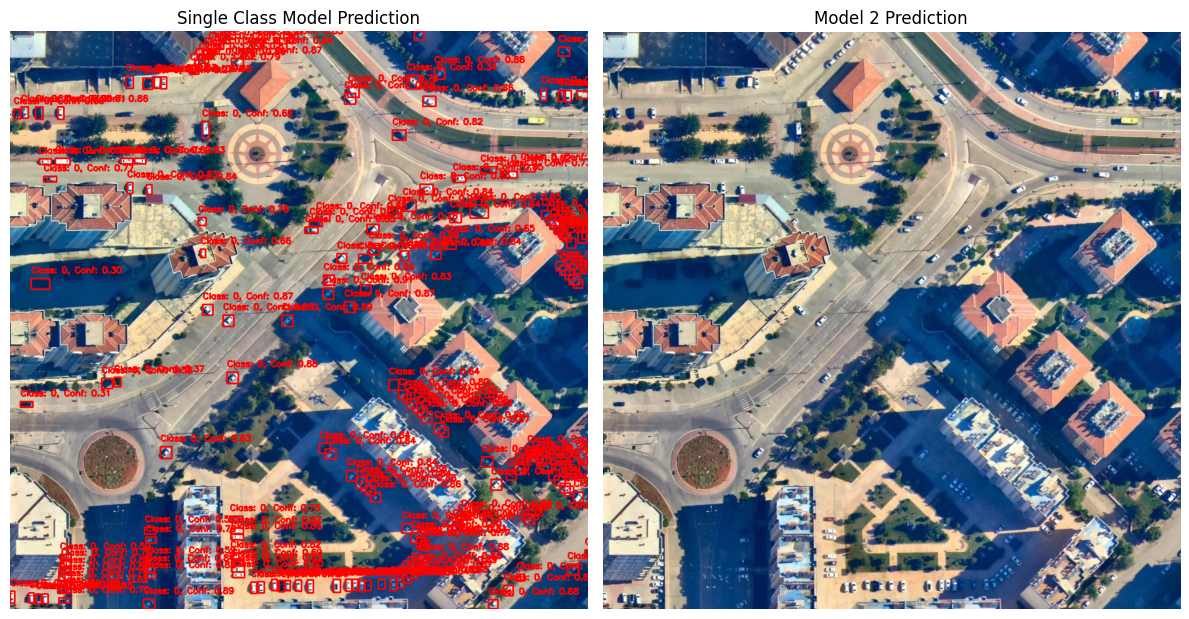

In [58]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Modelleri yükleme
single_class_model = YOLO('/content/model_dataset/single_class_model.pt')
model_2 = YOLO('/content/model_2.pt')

# Resmi yükleme
image_path = '/content/model_dataset/additional_class/images/val/1_316535_204040.jpg'  # Resmin yolunu belirtin

# İlk model ile tahmin yapma
results_model_1 = single_class_model.predict(image_path)

# İkinci model ile tahmin yapma
results_model_2 = model_2.predict(image_path)

# Resmi yükleme (OpenCV ile)
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV BGR'den RGB'ye dönüştürür

# İlk modelin sonuçlarını görselleştirme
image_model_1 = image.copy()  # İlk model için kopya oluştur
for result in results_model_1:
    boxes = result.boxes  # Box'ları al
    for box in boxes:
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()  # Koordinatları numpy dizisine dönüştür
        conf = box.conf[0].cpu().item()  # Güven skoru
        cls = box.cls[0].cpu().item()  # Sınıf

        # Bounding box'ı çizme
        cv2.rectangle(image_model_1, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)
        cv2.putText(image_model_1, f'Class: {int(cls)}, Conf: {conf:.2f}', (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# İkinci modelin sonuçlarını görselleştirme
image_model_2 = image.copy()  # İkinci model için kopya oluştur
for result in results_model_2:
    boxes = result.boxes  # Box'ları al
    for box in boxes:
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()  # Koordinatları numpy dizisine dönüştür
        conf = box.conf[0].cpu().item()  # Güven skoru
        cls = box.cls[0].cpu().item()  # Sınıf

        # Bounding box'ı çizme
        cv2.rectangle(image_model_2, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
        cv2.putText(image_model_2, f'Class: {int(cls)}, Conf: {conf:.2f}', (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Sonuçları yan yana göstermek için matplotlib ile gösterme
plt.figure(figsize=(12, 8))  # Figür boyutunu ayarlama

# İlk modelin çıktısı
plt.subplot(1, 2, 1)  # 1 satır, 2 sütun, 1. subplot
plt.imshow(image_model_1)
plt.title('Single Class Model Prediction')
plt.axis('off')  # Eksenleri kapatma

# İkinci modelin çıktısı
plt.subplot(1, 2, 2)  # 1 satır, 2 sütun, 2. subplot
plt.imshow(image_model_2)
plt.title('Model 2 Prediction')
plt.axis('off')  # Eksenleri kapatma

plt.tight_layout()  # Alt çizimlerin arasında boşluk bırakma
plt.show()

